## This notebook plots results for the evolution of the degeneracy parameter $\psi$ wrt time

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
%matplotlib inline

from mpmath import polylog
from scipy.interpolate import interp1d
import bokeh.palettes

from matplotlib import rc
rc('font', family='baskerville', size=22.)
rc('text', usetex=True)

In [24]:
# import data
alpha = 0.
#data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(alpha)+".dat", unpack=True)
data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
time  = data[0]
psi   = data[1]

In [26]:
def degeneracy_Auddy(t, M):
    """
    Time evolution of Psi as given by Auddy et al. 2016 (eq. 47) (for Psi << 1)
    
    Input
    -----
        t : time [years]
        M : mass [Msun]
        
    Output
    ------
        Psi: degeneracy
    """
    return np.power(317.8 + 2.053e-6*np.power(M, -1.094)*t, -0.2794)

def degeneracy(t, M):
    """
    Time evolution of Psi (for Psi << 1)
    
    Input
    -----
        t : time [years]
        M : mass [Msun]
        
    Output
    ------
        Psi: degeneracy
    """
    xH = 0.5*0.51
    X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
    kR = 0.01; omega = 1.; gamma = 2.36
    
    f1 = 3.5696*8.4231e-18*3.1536e7*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega
    
    return np.power(f1*f2*np.power(M, -1.094)*t, -0.2801)

t   = np.logspace(8, 12, 1000)
M   = 0.03
psi_Auddy = degeneracy_Auddy(t, M)
psi_simpl = degeneracy(t, M)

(100000000.0, 1000000000000.0)

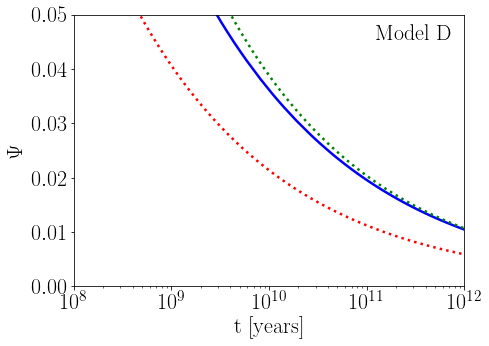

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

ax.plot(t, psi_Auddy, lw=2.5, color="red", ls=":")
ax.plot(t, psi_simpl, lw=2.5, color="green", ls=":")

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

ax.set_ylim(0., 0.05)
ax.set_xlim(1e8, 1e12)

/Users/maria/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/maria/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


Text(0.5, 0, '$\\Psi$')

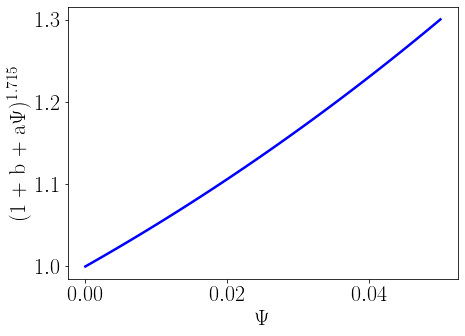

In [18]:
def one_b_a_factor(psi):    
    xH = 0.5*0.51
    X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    # return
    return np.power(1+b+a*psi, 1.715)

psi    = np.linspace(0., 0.05, 100)
factor = np.zeros(len(psi))
for i in range(len(psi)):
    factor[i] = one_b_a_factor(psi[i])

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(psi, factor, lw=2.5, color="blue")

ax.set_ylabel(r"(1 + b + a$\Psi)^{1.715}$")
ax.set_xlabel(r"$\Psi$")

#ax.set_ylim(0., 1.)

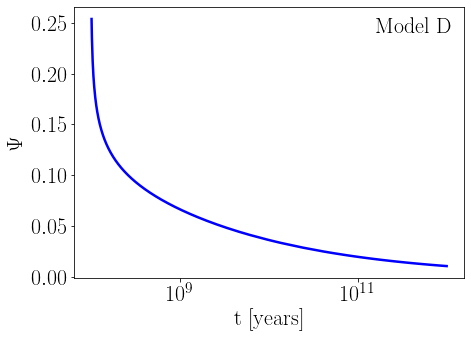

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Plot degeneracy evolution from [Auddy et al 2016](https://arxiv.org/abs/1607.04338), i.e. equation 47

In [13]:
t   = np.logspace(6, 9, 100)
M   = 0.03
Psi = degeneracy_Auddy(t, M)

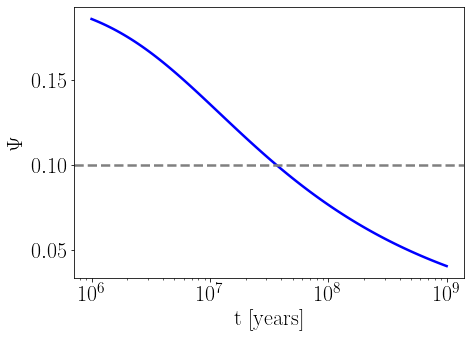

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(t, Psi, lw=2.5, color="blue")
ax.axhline(0.1, ls="--", color="grey", lw=2.5)

ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Sudy right-hand-side of ODE 

In [97]:
def func(psi, M, T, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha):
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    f1 = 1.1634e-18*np.power(b1, 2.856)*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega*np.power(1.-1.33*alpha/delta, 1.143)
    
    # return
    return (f1*f2*np.power(M, -1.094)*np.power(psi, 2.856*nu)*np.power(1+b+a*psi, 1.715))

In [98]:
psi = np.linspace(0.002, 0.999, 100)
M   = 0.03
T = np.power(10, 3.94); b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; omega=1.; gamma =2.36; delta=5.97; alpha=0.

rhs = np.zeros(100)
i   = 0

for _psi in psi:
    rhs[i] = func(_psi, M, T, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha)
    i +=1

In [99]:
data  = np.genfromtxt("../data/testing/rhs_vs_psi.dat", unpack=True)
psi_c = data[0]
rhs_c = data[1]

rhs_c = interp1d(psi_c, rhs_c)

Text(0.5, 0, '$\\Psi$')

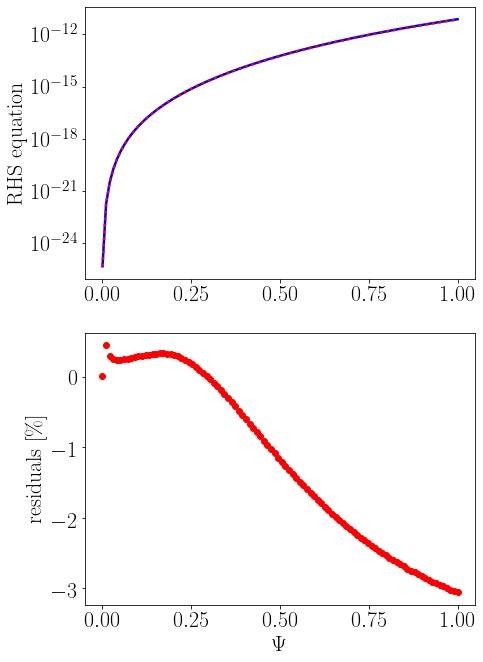

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(7,11))
ax[0].plot(psi, rhs, color="blue", lw=2.5, label="python")
ax[0].plot(psi, rhs_c(psi), color="red", ls=":", lw=2.5, label="c++")
ax[0].set_yscale("log")
ax[0].set_ylabel("RHS equation")

ax[1].plot(psi, (rhs_c(psi) - rhs)/rhs_c(psi)*100, "ro")
ax[1].set_ylabel("residuals [\%]")
ax[1].set_xlabel(r"$\Psi$")
#ax[1].set_yscale("log")

In [6]:
print("%.7e" %(3600.*24.*365.))

3.1536000e+07


In [7]:
4.2255e-15*3.1536e7

1.33255368e-07

### Results

In [43]:
ls     = ["solid", "dotted", "dashed", "dashdot", "-."] #dashdotdotted"]

# masses
M      = [0.01, 0.03, 0.05, 0.08, 0.09]

colors = bokeh.palettes.magma(6) # 6 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

**Varying consistently all parameters**

In [40]:
# import data
alpha = [-0.1, -0.01, 0., 0.006, 0.010, 0.015]
time  = {}
psi   = {}
for a in alpha:
    try:
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(a)+".dat", unpack=True)
    except:
        print(a)
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
    time[a] = data[0]
    psi[a]  = {}
    i       = 1
    for m in M:
        psi[a][m] = data[i]
        i += 1

0.0


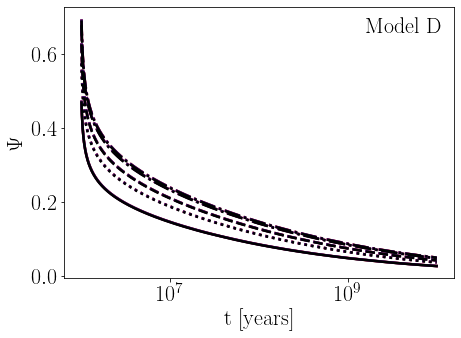

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

j = 0
for a in alpha:
    i = 0
    for m in M:
        ax.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j])
        i += 1
    j = j+1

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

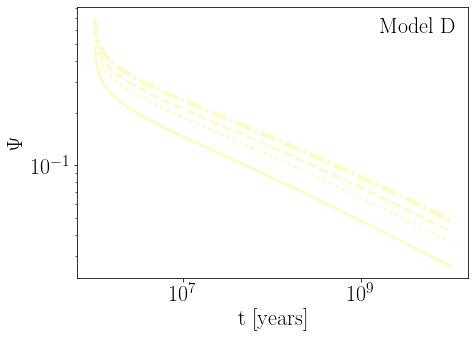

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

j = 0
for a in alpha[0:1]:
    i = 0
    for m in M:
        ax.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j])
        i += 1
    j = j+1

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")
ax.set_yscale("log")